<a href="https://colab.research.google.com/github/PawanPPatil/Data-Science-Assignment-eCommerce-Transactions-Dataset/blob/main/Pawan_Patil_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Transactions.csv to Transactions.csv
Saving Customers.csv to Customers.csv


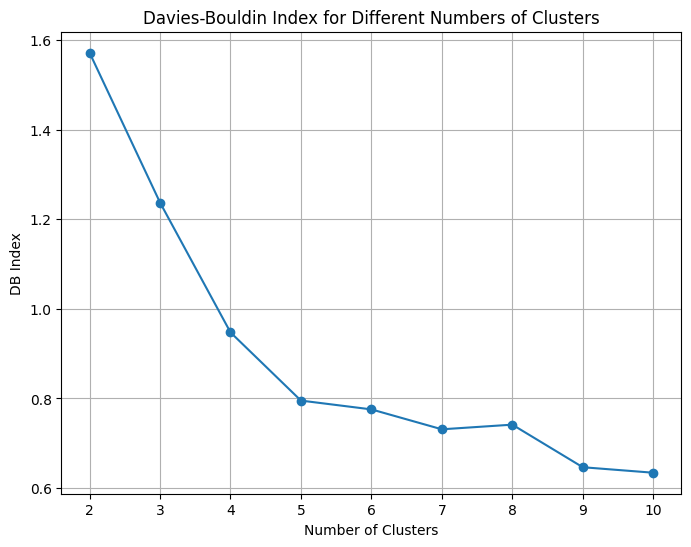

Optimal Number of Clusters: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

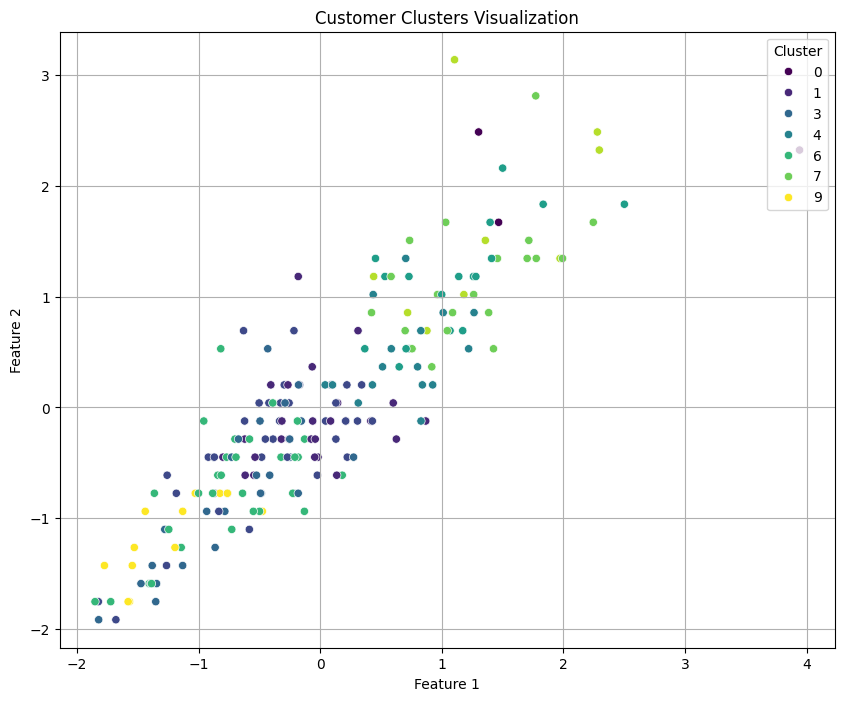

Davies-Bouldin Index for Optimal Clusters: 0.63
  Cluster   TotalValue              Quantity     
                  mean        sum       mean  sum
0       0  7557.540000   22672.62  26.000000   78
1       1  3328.532222   89870.37  12.037037  325
2       2  2668.931351   98750.46  10.513514  389
3       3  2162.534444   58388.43   8.185185  221
4       4  4712.269412   80108.58  15.647059  266
5       5  5510.972941   93686.54  19.941176  339
6       6  2115.781000   63473.43   8.366667  251
7       7  5750.898000  115017.96  19.850000  397
8       8  5951.437778   53562.94  22.666667  204
9       9  1205.352500   14464.23   5.583333   67


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload datasets
uploaded = files.upload()

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID", how="left")

# Feature Engineering: Aggregate transaction data per customer
customer_features = merged_data.groupby("CustomerID").agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': 'first',  # Categorical feature
}).reset_index()

# Encode categorical feature 'Region'
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

# Standardize the features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

# Determine the optimal number of clusters using the Davies-Bouldin Index
db_scores = []
cluster_range = range(2, 11)  # Clusters from 2 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, labels)
    db_scores.append(db_index)

# Plot the Davies-Bouldin Index for different numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, db_scores, marker='o')
plt.title("Davies-Bouldin Index for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("DB Index")
plt.grid()
plt.show()

# Select the optimal number of clusters (minimum DB Index)
optimal_k = cluster_range[np.argmin(db_scores)]
print(f"Optimal Number of Clusters: {optimal_k}")

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Save clustering results to a CSV
customer_features.to_csv('CustomerSegmentation.csv', index=False)

# Download the clustering results CSV file
files.download('CustomerSegmentation.csv')

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1],
    hue=customer_features['Cluster'], palette="viridis"
)
plt.title("Customer Clusters Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster", loc="upper right")
plt.grid()
plt.show()

# Display clustering summary
print(f"Davies-Bouldin Index for Optimal Clusters: {min(db_scores):.2f}")
print(customer_features.groupby("Cluster").agg({
    'TotalValue': ['mean', 'sum'],
    'Quantity': ['mean', 'sum'],
}).reset_index())
